In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Mode
mode = 1                        # Mode number (choose mode 1, 2, 3, 4, etc.)
# Constants
c = 2.99792458e8                # speed of light [m/s]
mi_0 = 4 * math.pi * 1.0e-7     # vacuum magnetic permittivity [H/m]
epsilon_0 = 8.854e-12           # Permittivity of free space (F/m)

#
# Finite-Difference Time-Domain Solution
# For 1D Cavity Filled With Homogeneous Medium Maxwell's Equations Problem
#
def maxwell_1d_fdtd_simulation(title=None, filename=None,horizontal=True):
  # Cavity parameters
  L = 4.0               # Length of the cavity (meters)
  N = 200               # Number of spatial steps
  dx = L / N            # Spatial step size
  dt = dx / (2 * c)     # Time step (Courant stability condition)
  T = 2 / c             # Total time (seconds)
  n_steps = int(T / dt) # Number of time steps
  extent = [0, T, 0, L] # { t_min, t_max, x_min, x_max }

  # Initialize the fields
  Ey = np.zeros(N)      # Electric field E_y
  Hz = np.zeros(N)      # Magnetic field H_z

  # Arrays to store the fields for plotting
  Ey_t = np.zeros((n_steps, N))  # E_y over time
  Hz_t = np.zeros((n_steps, N))  # H_z over time

  # Initialize the mode (n) and initial condition for E_y
  n = mode                # Mode number (choose mode 1, 2, 3, 4, etc.)
  Ey_initial = np.sin(n * np.pi * np.linspace(0, L, N) / L)  # E_y(x,0)
  Ey[:] = Ey_initial

  # FDTD loop
  for t in range(n_steps):
      # Update magnetic field Hz
      for i in range(N-1):
          Hz[i] = Hz[i] + (dt / (mi_0 * dx)) * (Ey[i+1] - Ey[i])

      # Update electric field Ey
      for i in range(1, N):
          Ey[i] = Ey[i] + (dt / (epsilon_0 * dx)) * (Hz[i] - Hz[i-1])

      # PEC boundary conditions (E=0 at x=0 and x=L)
      Ey[0] = 0
      Ey[-1] = 0

      # Store the fields for plotting
      Ey_t[t, :] = Ey
      Hz_t[t, :] = Hz

  # Time and space grids
  x_grid = np.linspace(0, L, N)       # Space grid (x-axis)
  t_grid = np.linspace(0, T, n_steps) # Time grid (y-axis)


  if (horizontal):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
  else:
    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(5, 5))

  # Plot E_y colormap
  plt.sca(ax1)
  plt.imshow(Ey_t.T, cmap='jet', interpolation='bicubic', origin='lower', extent=extent)
  plt.xlabel("t = time [s]")
  plt.ylabel("x = distance [m]")
  plt.title("Electric Field (Ey) [V/m]")
  plt.colorbar()
  plt.gca().set_aspect('auto')

  # Plot H_z colormap
  plt.sca(ax2)
  plt.imshow(Hz_t.T, cmap='jet', interpolation='bicubic', origin='lower', extent=extent)
  plt.xlabel("t = time [s]")
  plt.ylabel("x = distance [m]")
  plt.title("Magnetic Field (Hz) [A/m]")
  plt.colorbar()
  plt.gca().set_aspect('auto')

  plt.tight_layout()  # Adjusts spacing between the plots
  plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.8)

  if (title):
    fig.suptitle(title, fontsize=16,x=0.01,ha='left')
  if (filename):
    plt.savefig(filename, format='png', dpi=144, bbox_inches='tight')

  plt.show()


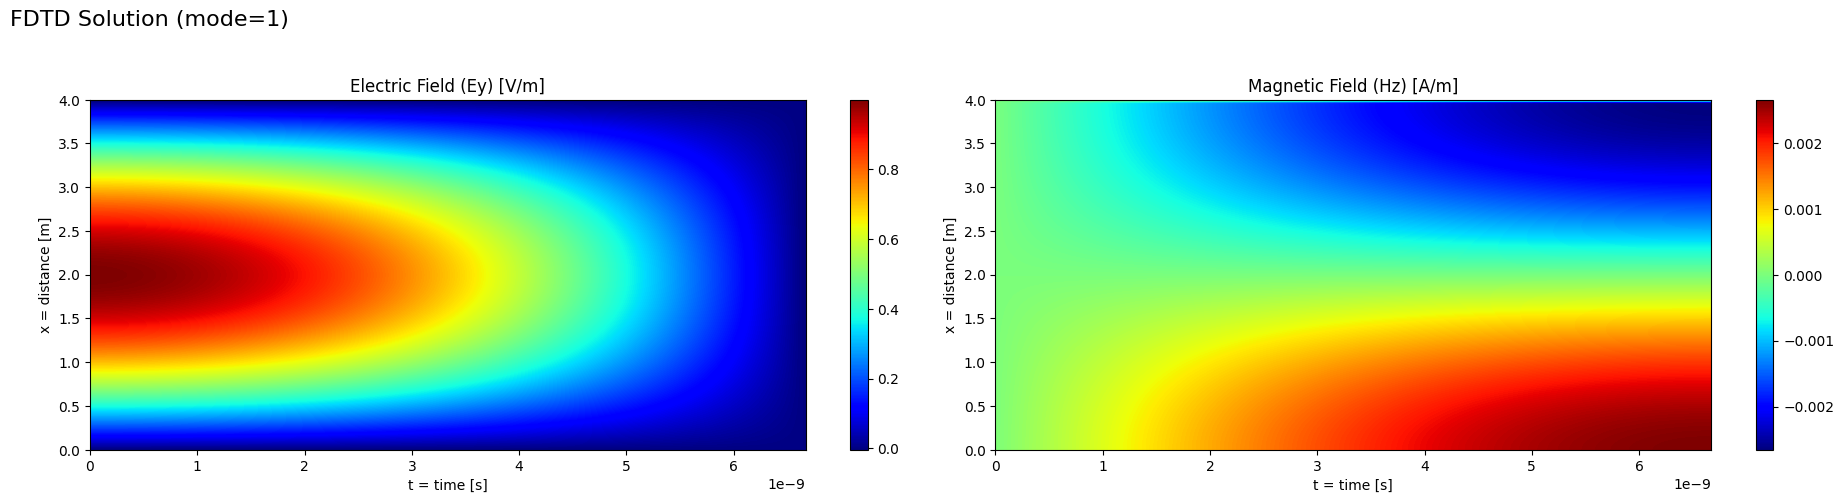

In [54]:
maxwell_1d_fdtd_simulation(f'FDTD Solution (mode={mode})',
                           f'FDTD_Solution_mode_{mode}.png')